# Experiments

Recreating experiments of a network model for the polarization of political opinion.

__Article:__ Higham, Desmond J., and Alexander V. Mantzaris. “A Network Model for Polarization of Political Opinion.” _Chaos: An Interdisciplinary Journal of Nonlinear Science_, vol. 30, no. 4, 7 Apr. 2020, p. 043109., doi:10.1063/1.5131018. 

## Setup

#### Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

print("All packages imported!")

All packages imported!


#### Random Seed

In [2]:
np.random.seed(42)

#### Figure Resolution

In [3]:
mpl.rcParams['figure.dpi'] = 100

## The network model

__Implementation Excerpts from Section III of Article__ 

- There are $n$ individuals whose associations are represented by a fixed adjacency matrix $A \in \mathbb{R}_{n×n}$. So, $a_{ij} = 1$ if person $i$ has the potential to be influenced by person $j$, and $a_{ij} = 0$ otherwise. By construction, $a_{ii} = 0$.


- Let $d_i$ denote the number of influencers of person $i$; in graph-theoretical terms, $d_i$ is the out-degree of node $i$.
We will work with the scaled adjacency matrix $\hat{A}$, which has $ij$ entry
given by $a_{ij}/d_i$.

- $k = 0, 1, 2, \dots,$ letting $u^k \in \mathbb{R}_n$ be such that $u_k^i$
is the opinion of person $i$ at time point $k$.

Our model takes the form

\begin{equation}
    \mathbf{u}_{k+1} = F(\mathbf{u}^k)
\end{equation}

where $F : \mathbb{R}_n \rightarrow \mathbb{R}_n$ satisfies

\begin{equation}
    (F(u))_i = u_i + r(\theta - u_i) + \epsilon u_i (1 - u_i) \left((\hat{A}u)_i - \theta \right),\quad \text{for } 1 \leq i \leq n. 
\end{equation}

- $r > 0$ determines the rate at which an isolated individual would approach the level $\theta$.
- $\epsilon > 0$ controls the strength of the external influence.
- $(\hat{A}u)_i − \theta$ takes the average view over the network neighbors and compares this with the value $\theta$. 

    - If this average over the neighbors exceeds $\theta$, then, on the grounds that node $i$ is associating with a group whose views are currently more conservative than the typical value $\theta$, the term $\epsilon u_i (1 - u_i) \left((\hat{A}u)_i - \theta \right)$ makes a positive contribution to $u_i^{k+1}$ in (3). Conversely, if the average opinion over the neighbors is below $\theta$, then this term reduces $u_i^{k+1}$ in (3).

- We chose to set $u_i^{k+1} = 0$ and $u_i^{k+1} = 1$ if $F$ produced $u_i^{k+1} < 0$ or $u_i^{k+1} > 1$, respectively.

In [4]:
def F(U, A, theta, r, epsilon):
    U_next = U + r * (theta - U) + epsilon * (U * (1 - U)) * (0.5 * (A @ U) - theta)
    return np.clip(U_next, 0, 1)

# Simulations for the periodic ring ($\theta = 1/2$)

In [5]:
theta = 0.5
r = 0.5
epsilon = 2.5

# population
n = 32

# initial opinions
Y = np.linspace(-10, 10, n)
V = np.exp(Y) / (1 + np.exp(Y))
U_initial = (0.3 + 0.225 * V)

# associations
A = np.zeros((n,n))
for i in range(0, n):
    A[i, (i + 1) % n] = 1
    A[i, (i - 1) % n] = 1

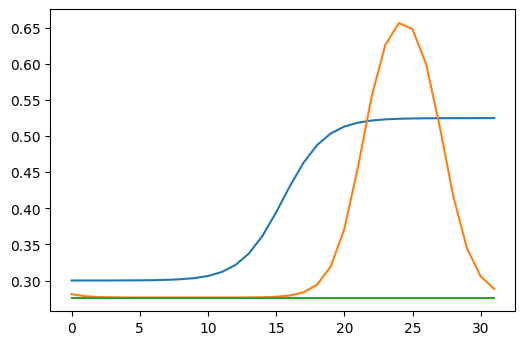

In [6]:
U = U_initial.copy()

sns.lineplot(x=np.arange(n), y = U)

for i in range(1, 301):
    U = F(U, A, theta, r, epsilon)
    
    if i % 150 == 0:
        sns.lineplot(x=np.arange(n), y = U)  